**Titanic**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Title'] = df['Name'].str.extract(r'(Mr|Mrs|Miss|Ms|Dr|Rev|Major)',expand=True)
df.groupby('Title')['Age'].median()
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df['is_alone'] = np.where(df['family_size'] == 1, 1, 0)
df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          843 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        843 non-null    object 
 13  family_size  891 non-null    int64  
 14  is_alone     891 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             4

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family_size,is_alone
count,891.000000,891.000000,891.000000,843.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,30.515421,0.523008,0.381594,32.204208,1.904602,0.602694
std,257.353842,0.486592,0.836071,12.246366,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,0.000000,3.000000,31.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000


In [ ]:
df.drop(columns=['Name','Cabin','Ticket','Title'],inplace=True)
df.dropna(subset=['Embarked'],inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler

scaler = LabelEncoder()
df['Sex'] = scaler.fit_transform(df[['Sex']])

scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

scaler = MinMaxScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

scaler = MinMaxScaler()
df['SibSp'] = scaler.fit_transform(df[['SibSp']])

scaler = MinMaxScaler()
df['family_size'] = scaler.fit_transform(df[['family_size']])

scaler = MinMaxScaler()
df['Parch'] = scaler.fit_transform(df[['Parch']])

df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)

df['Pclass_Sex'] = df['Pclass'] * df['Sex']
df['Fare_Pclass'] = df['Fare'] * df['Pclass']
display(df.head())

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,family_size,is_alone,Embarked_Q,Embarked_S,Pclass_Sex,Fare_Pclass
0,1,0,3,1,0.268139,0.125,0.0,0.014151,0.1,0,False,True,3,0.042453
1,2,1,1,0,0.470032,0.125,0.0,0.139136,0.1,0,False,False,0,0.139136
2,3,1,3,0,0.318612,0.000,0.0,0.015469,0.0,1,False,True,0,0.046406
3,4,1,1,0,0.432177,0.125,0.0,0.103644,0.1,0,False,True,0,0.103644
4,5,0,3,1,0.432177,0.000,0.0,0.015713,0.0,1,False,True,3,0.047138


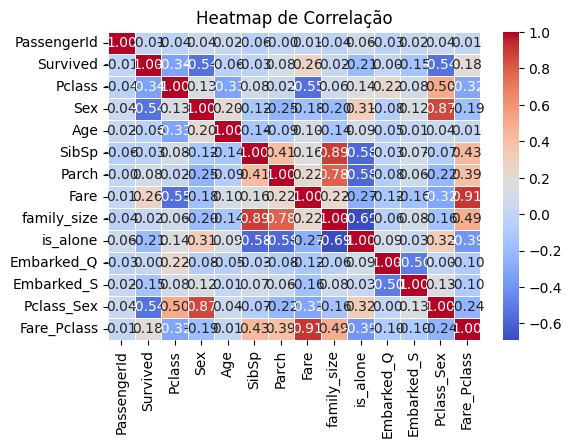

In [ ]:
# Plotar heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlação")
plt.show()

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,340


In [ ]:
y = df['Survived']
df_new = df.drop(columns=['Survived'])

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selecionar as 2 melhores features usando ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=6)
X = selector.fit_transform(df_new, y)

# Quais features foram selecionadas
mask = selector.get_support()
selected_features = df_new.columns[mask]

print("Features escolhidas:", list(selected_features))
print("Novo shape:", X.shape)
X

Features escolhidas: ['Pclass', 'Sex', 'Fare', 'is_alone', 'Pclass_Sex', 'Fare_Pclass']
Novo shape: (889, 6)


array([[3.        , 1.        , 0.01415106, 0.        , 3.        ,
        0.04245317],
       [1.        , 0.        , 0.13913574, 0.        , 0.        ,
        0.13913574],
       [3.        , 0.        , 0.01546857, 1.        , 0.        ,
        0.04640571],
       ...,
       [3.        , 0.        , 0.04577135, 0.        , 0.        ,
        0.13731406],
       [1.        , 1.        , 0.0585561 , 1.        , 1.        ,
        0.0585561 ],
       [3.        , 1.        , 0.01512699, 1.        , 3.        ,
        0.04538098]])

In [ ]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

k: 1 , acuracia: 0.7640449438202247
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       165
           1       0.72      0.63      0.67       102

    accuracy                           0.76       267
   macro avg       0.75      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



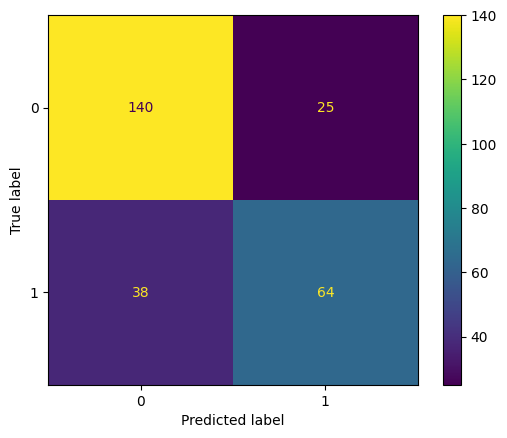

k: 2 , acuracia: 0.7640449438202247
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       165
           1       0.84      0.47      0.60       102

    accuracy                           0.76       267
   macro avg       0.79      0.71      0.72       267
weighted avg       0.78      0.76      0.74       267



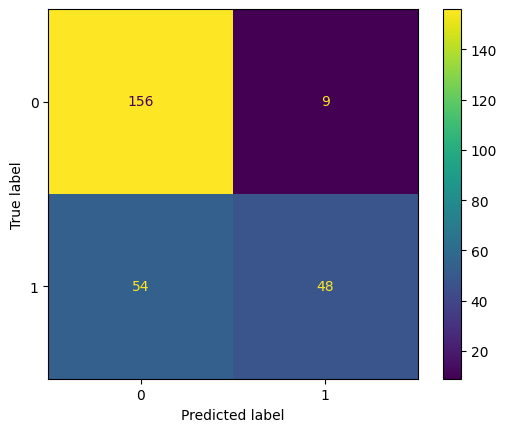

k: 3 , acuracia: 0.7827715355805244
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       165
           1       0.77      0.62      0.68       102

    accuracy                           0.78       267
   macro avg       0.78      0.75      0.76       267
weighted avg       0.78      0.78      0.78       267



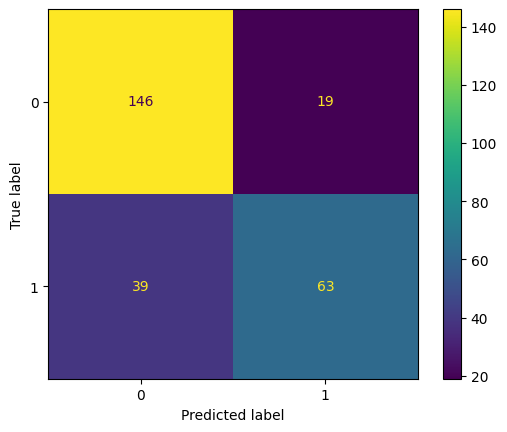

k: 4 , acuracia: 0.7565543071161048
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       165
           1       0.76      0.53      0.62       102

    accuracy                           0.76       267
   macro avg       0.76      0.71      0.72       267
weighted avg       0.76      0.76      0.75       267



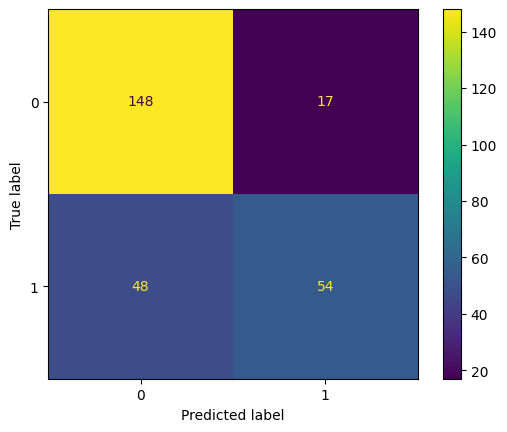

k: 5 , acuracia: 0.7640449438202247
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       165
           1       0.72      0.62      0.67       102

    accuracy                           0.76       267
   macro avg       0.75      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



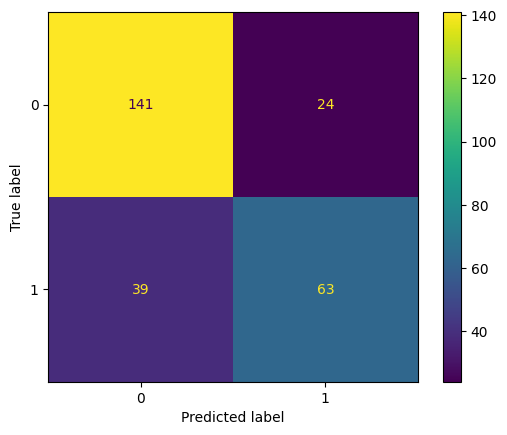

k: 6 , acuracia: 0.7827715355805244
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       165
           1       0.82      0.55      0.66       102

    accuracy                           0.78       267
   macro avg       0.80      0.74      0.75       267
weighted avg       0.79      0.78      0.77       267



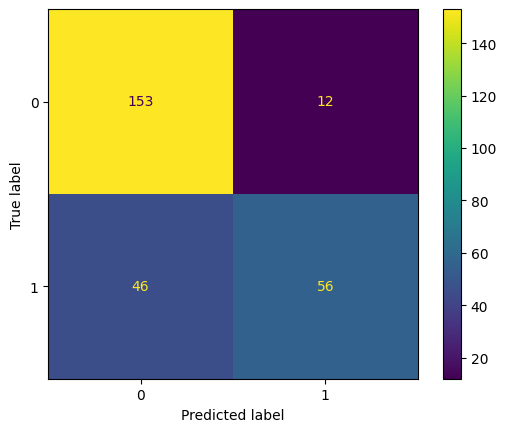

k: 7 , acuracia: 0.7602996254681648
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       165
           1       0.74      0.58      0.65       102

    accuracy                           0.76       267
   macro avg       0.75      0.73      0.73       267
weighted avg       0.76      0.76      0.75       267



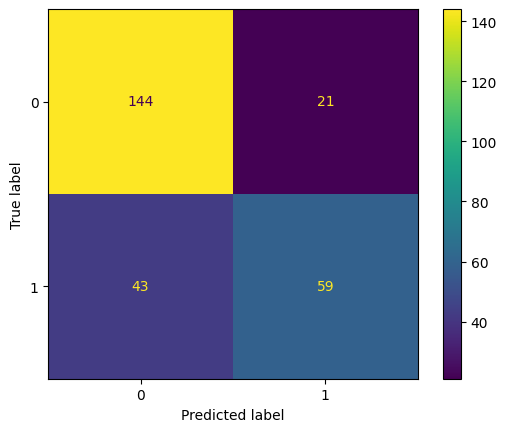

k: 8 , acuracia: 0.7865168539325843
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       165
           1       0.81      0.58      0.67       102

    accuracy                           0.79       267
   macro avg       0.79      0.75      0.76       267
weighted avg       0.79      0.79      0.78       267



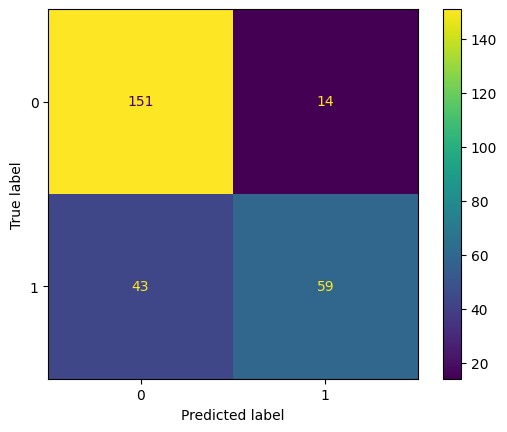

k: 9 , acuracia: 0.7640449438202247
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       165
           1       0.71      0.64      0.67       102

    accuracy                           0.76       267
   macro avg       0.75      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



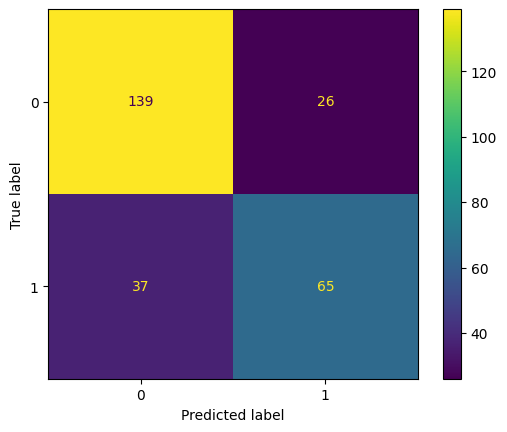

k: 10 , acuracia: 0.7677902621722846
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       165
           1       0.75      0.59      0.66       102

    accuracy                           0.77       267
   macro avg       0.76      0.73      0.74       267
weighted avg       0.77      0.77      0.76       267



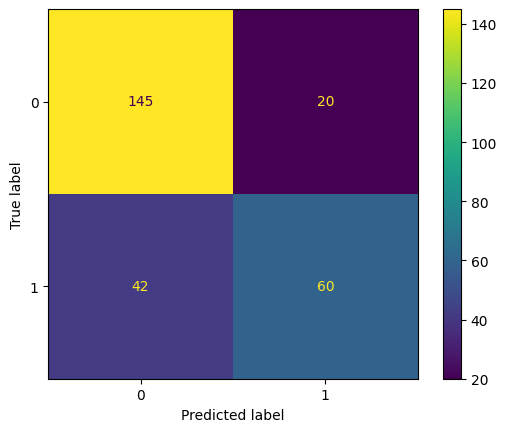

Melhor k: 8


In [ ]:
k_valores = np.arange(1, 11)
acc = []
for k in k_valores:
  knn = KNeighborsClassifier(n_neighbors=k, metric='cityblock') # 'euclidean', 'cityblock', 'chebyshev'
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  print(f'k: {k} , acuracia: {accuracy_score(y_test,y_pred)}')
  print(classification_report(y_test, y_pred))
  acc.append(accuracy_score(y_test,y_pred))
  cm = confusion_matrix(y_test,y_pred)
  cmd = ConfusionMatrixDisplay(cm, display_labels=list(df['Survived'].value_counts().index))
  # plota a matriz de confusão
  cmd.plot()
  plt.show()
acc = np.array(acc)
print(f'Melhor k: {k_valores[acc.argmax()]}')

k: 1 , acuracia: 0.7640449438202247
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       165
           1       0.72      0.63      0.67       102

    accuracy                           0.76       267
   macro avg       0.75      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



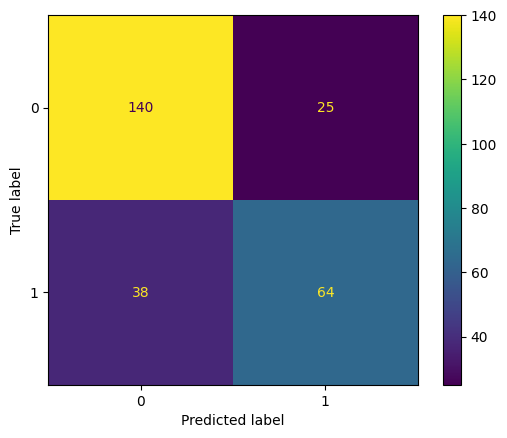

k: 2 , acuracia: 0.7640449438202247
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       165
           1       0.84      0.47      0.60       102

    accuracy                           0.76       267
   macro avg       0.79      0.71      0.72       267
weighted avg       0.78      0.76      0.74       267



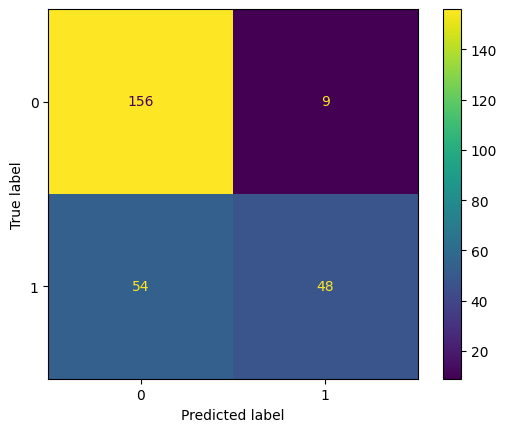

k: 3 , acuracia: 0.7827715355805244
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       165
           1       0.77      0.62      0.68       102

    accuracy                           0.78       267
   macro avg       0.78      0.75      0.76       267
weighted avg       0.78      0.78      0.78       267



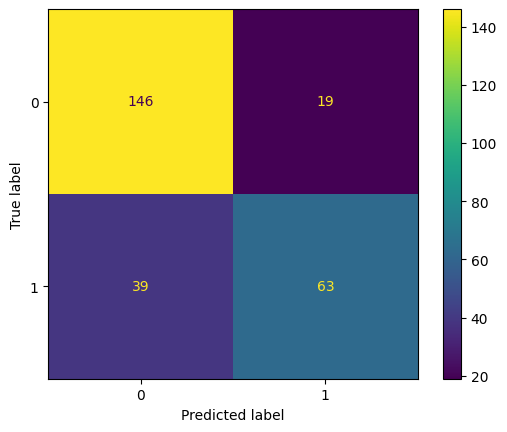

k: 4 , acuracia: 0.7565543071161048
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       165
           1       0.76      0.53      0.62       102

    accuracy                           0.76       267
   macro avg       0.76      0.71      0.72       267
weighted avg       0.76      0.76      0.75       267



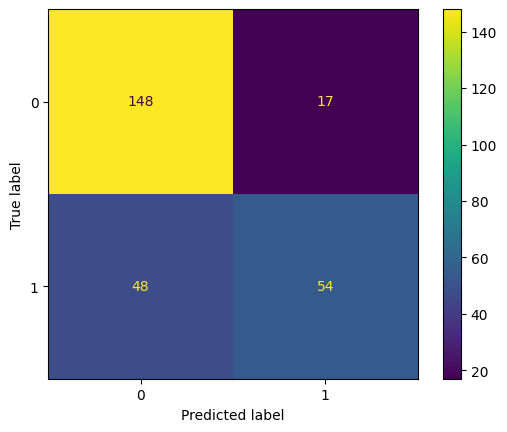

k: 5 , acuracia: 0.7640449438202247
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       165
           1       0.72      0.62      0.67       102

    accuracy                           0.76       267
   macro avg       0.75      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



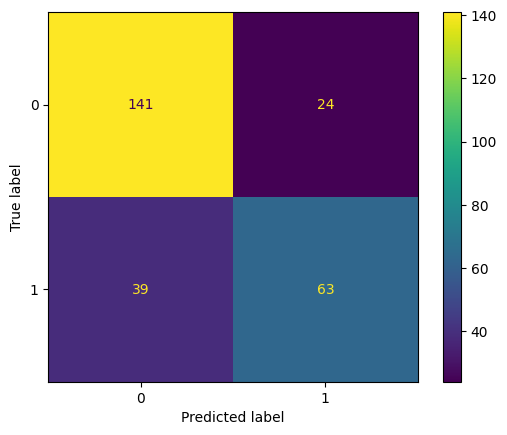

k: 6 , acuracia: 0.7827715355805244
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       165
           1       0.82      0.55      0.66       102

    accuracy                           0.78       267
   macro avg       0.80      0.74      0.75       267
weighted avg       0.79      0.78      0.77       267



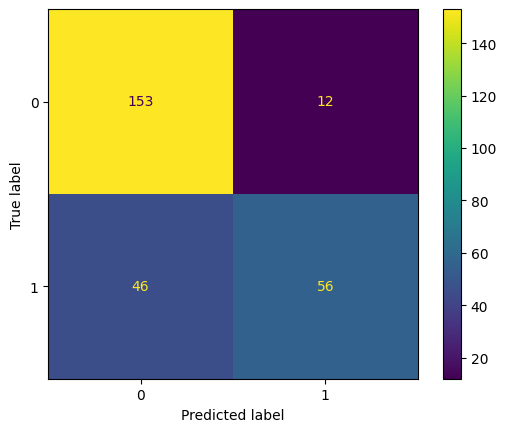

k: 7 , acuracia: 0.7640449438202247
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       165
           1       0.75      0.58      0.65       102

    accuracy                           0.76       267
   macro avg       0.76      0.73      0.74       267
weighted avg       0.76      0.76      0.76       267



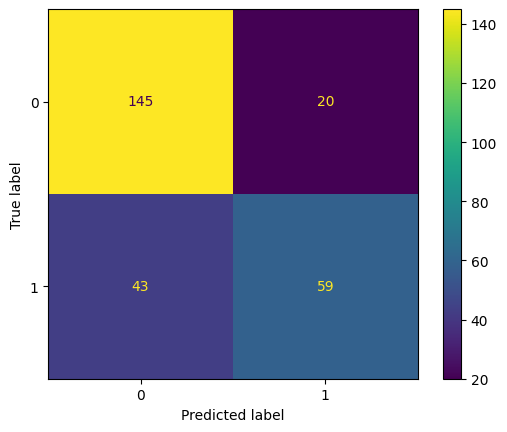

k: 8 , acuracia: 0.7865168539325843
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       165
           1       0.81      0.58      0.67       102

    accuracy                           0.79       267
   macro avg       0.79      0.75      0.76       267
weighted avg       0.79      0.79      0.78       267



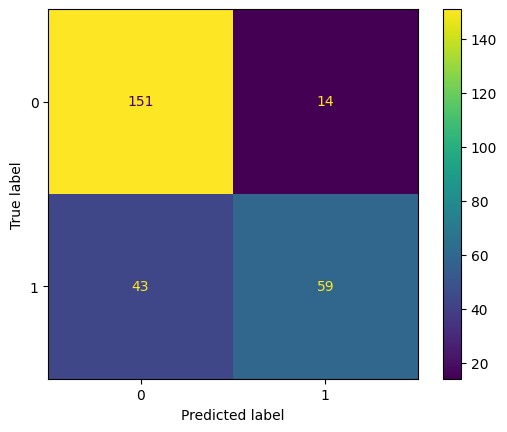

k: 9 , acuracia: 0.7640449438202247
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       165
           1       0.71      0.64      0.67       102

    accuracy                           0.76       267
   macro avg       0.75      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



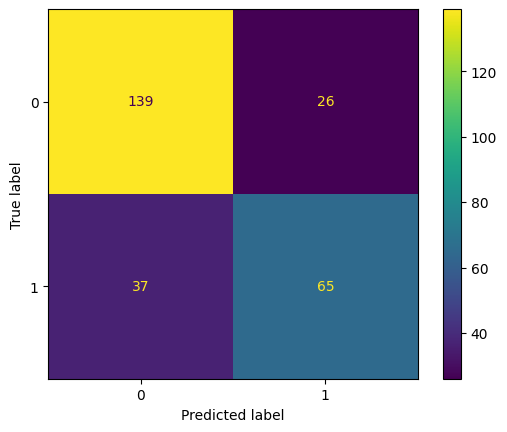

k: 10 , acuracia: 0.7677902621722846
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       165
           1       0.75      0.59      0.66       102

    accuracy                           0.77       267
   macro avg       0.76      0.73      0.74       267
weighted avg       0.77      0.77      0.76       267



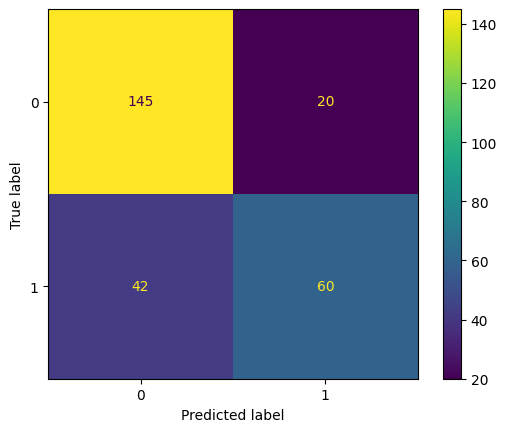

Melhor k: 8


In [ ]:
k_valores = np.arange(1, 11)
acc = []
for k in k_valores:
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') # 'euclidean', 'cityblock', 'chebyshev'
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  print(f'k: {k} , acuracia: {accuracy_score(y_test,y_pred)}')
  print(classification_report(y_test, y_pred))
  acc.append(accuracy_score(y_test,y_pred))
  cm = confusion_matrix(y_test,y_pred)
  cmd = ConfusionMatrixDisplay(cm, display_labels=list(df['Survived'].value_counts().index))
  # plota a matriz de confusão
  cmd.plot()
  plt.show()
acc = np.array(acc)
print(f'Melhor k: {k_valores[acc.argmax()]}')

k: 1 , acuracia: 0.7640449438202247
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       165
           1       0.72      0.63      0.67       102

    accuracy                           0.76       267
   macro avg       0.75      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



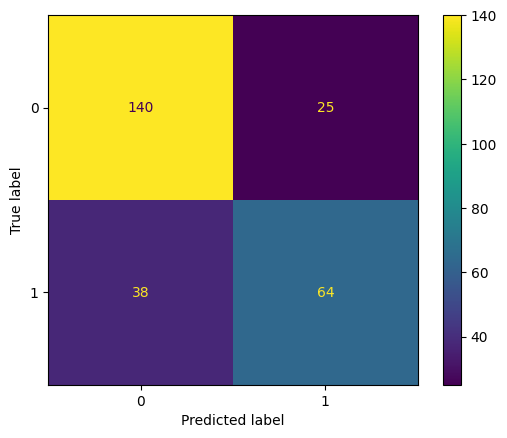

k: 2 , acuracia: 0.7640449438202247
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       165
           1       0.84      0.47      0.60       102

    accuracy                           0.76       267
   macro avg       0.79      0.71      0.72       267
weighted avg       0.78      0.76      0.74       267



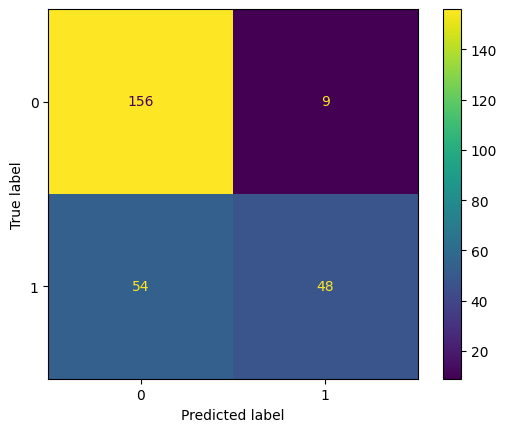

k: 3 , acuracia: 0.7827715355805244
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       165
           1       0.77      0.62      0.68       102

    accuracy                           0.78       267
   macro avg       0.78      0.75      0.76       267
weighted avg       0.78      0.78      0.78       267



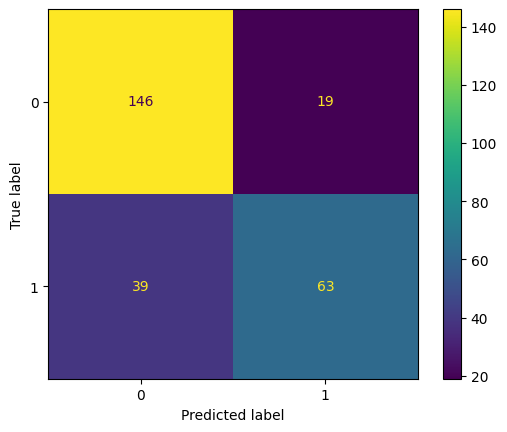

k: 4 , acuracia: 0.7565543071161048
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       165
           1       0.76      0.53      0.62       102

    accuracy                           0.76       267
   macro avg       0.76      0.71      0.72       267
weighted avg       0.76      0.76      0.75       267



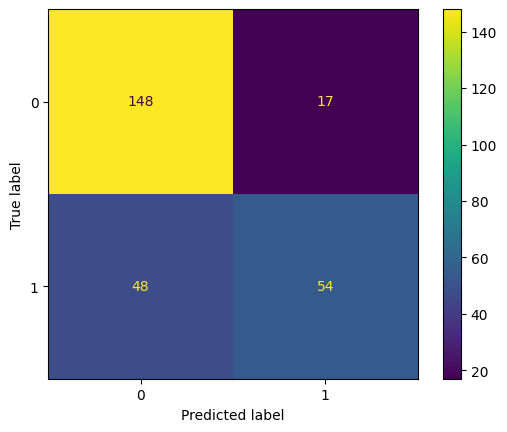

k: 5 , acuracia: 0.7677902621722846
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       165
           1       0.73      0.62      0.67       102

    accuracy                           0.77       267
   macro avg       0.76      0.74      0.75       267
weighted avg       0.76      0.77      0.76       267



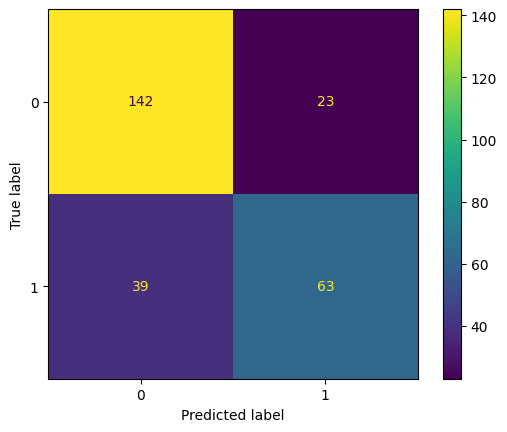

k: 6 , acuracia: 0.7827715355805244
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       165
           1       0.82      0.55      0.66       102

    accuracy                           0.78       267
   macro avg       0.80      0.74      0.75       267
weighted avg       0.79      0.78      0.77       267



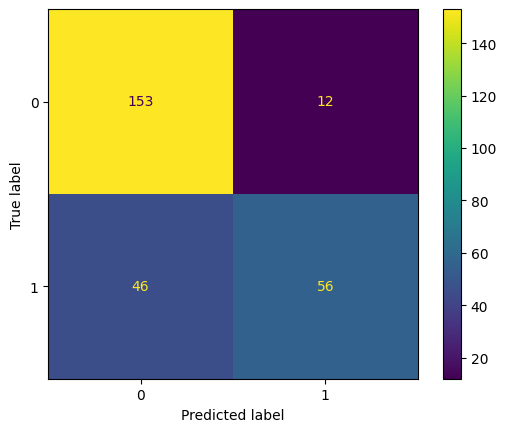

k: 7 , acuracia: 0.7602996254681648
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       165
           1       0.74      0.58      0.65       102

    accuracy                           0.76       267
   macro avg       0.75      0.73      0.73       267
weighted avg       0.76      0.76      0.75       267



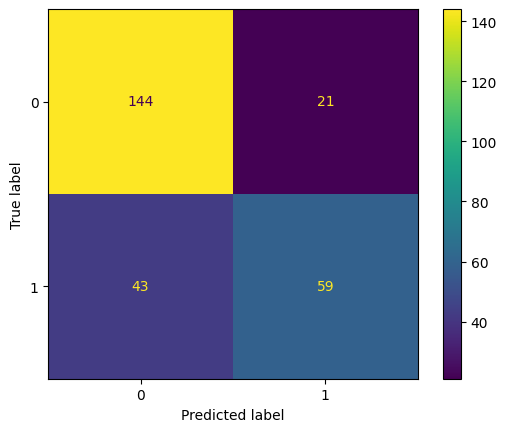

k: 8 , acuracia: 0.7865168539325843
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       165
           1       0.81      0.58      0.67       102

    accuracy                           0.79       267
   macro avg       0.79      0.75      0.76       267
weighted avg       0.79      0.79      0.78       267



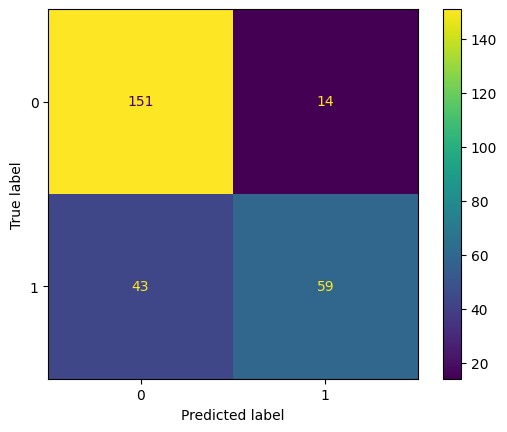

k: 9 , acuracia: 0.7640449438202247
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       165
           1       0.71      0.64      0.67       102

    accuracy                           0.76       267
   macro avg       0.75      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



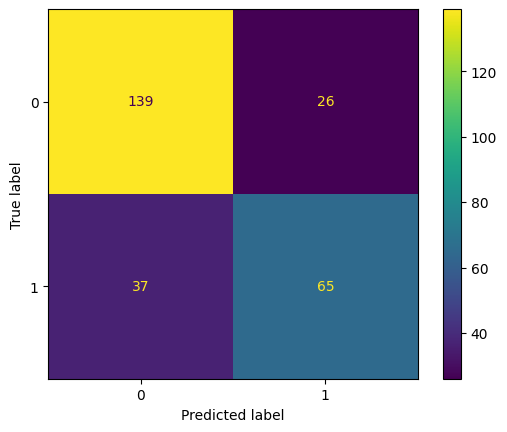

k: 10 , acuracia: 0.7677902621722846
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       165
           1       0.75      0.59      0.66       102

    accuracy                           0.77       267
   macro avg       0.76      0.73      0.74       267
weighted avg       0.77      0.77      0.76       267



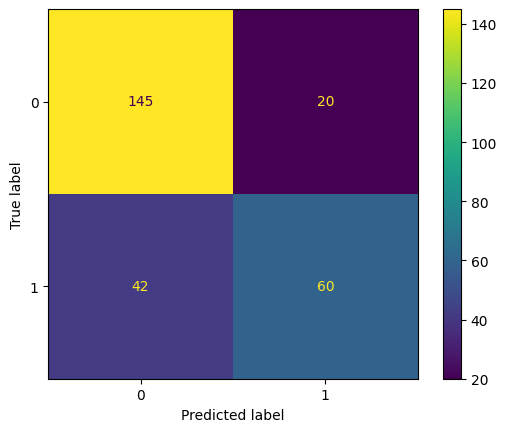

Melhor k: 8


In [ ]:
k_valores = np.arange(1, 11)
acc = []
for k in k_valores:
  knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev') # 'euclidean', 'cityblock', 'chebyshev'
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  print(f'k: {k} , acuracia: {accuracy_score(y_test,y_pred)}')
  print(classification_report(y_test, y_pred))
  acc.append(accuracy_score(y_test,y_pred))
  cm = confusion_matrix(y_test,y_pred)
  cmd = ConfusionMatrixDisplay(cm, display_labels=list(df['Survived'].value_counts().index))
  # plota a matriz de confusão
  cmd.plot()
  plt.show()
acc = np.array(acc)
print(f'Melhor k: {k_valores[acc.argmax()]}')

Decision Tree Accuracy: 0.7940074906367042
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       165
           1       0.79      0.63      0.70       102

    accuracy                           0.79       267
   macro avg       0.79      0.76      0.77       267
weighted avg       0.79      0.79      0.79       267



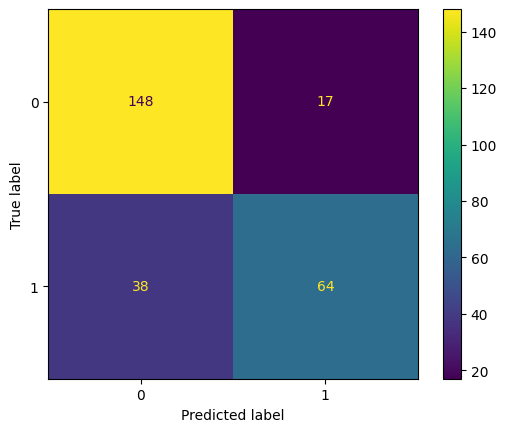

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test,y_pred_dt)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(df['Survived'].value_counts().index))
# plota a matriz de confusão
cmd.plot()
plt.show()

Naive Bayes Accuracy: 0.7453183520599251
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       165
           1       0.64      0.75      0.69       102

    accuracy                           0.75       267
   macro avg       0.74      0.75      0.74       267
weighted avg       0.76      0.75      0.75       267



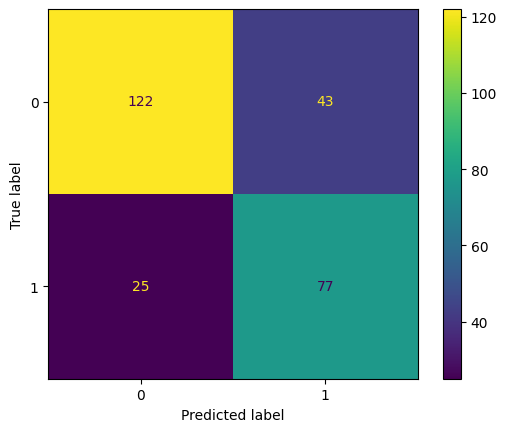

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
cm = confusion_matrix(y_test,y_pred_nb)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(df['Survived'].value_counts().index))
# plota a matriz de confusão
cmd.plot()
plt.show()

Logistic Regression Accuracy: 0.7677902621722846
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       165
           1       0.71      0.66      0.68       102

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.75       267
weighted avg       0.77      0.77      0.77       267



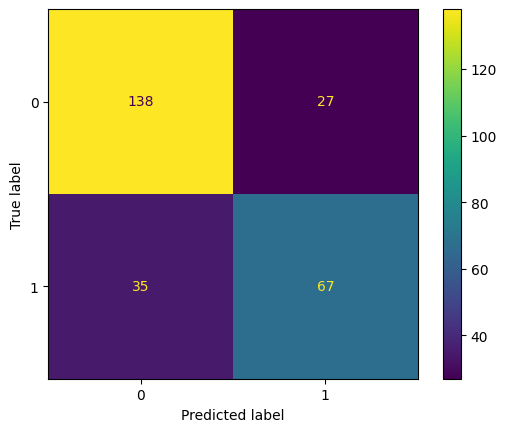

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
cm = confusion_matrix(y_test,y_pred_lr)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(df['Survived'].value_counts().index))
# plota a matriz de confusão
cmd.plot()
plt.show()

SVM Accuracy: 0.7715355805243446
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       165
           1       0.84      0.50      0.63       102

    accuracy                           0.77       267
   macro avg       0.79      0.72      0.73       267
weighted avg       0.78      0.77      0.76       267



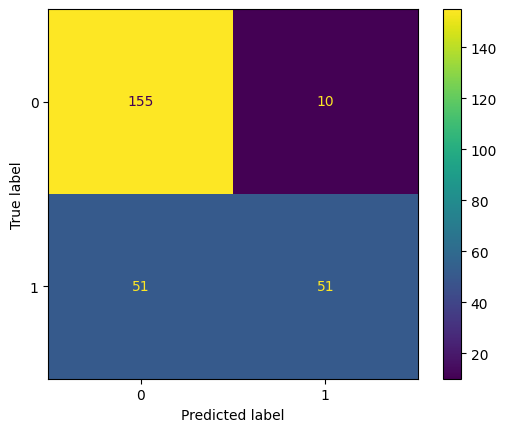

In [ ]:
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
cm = confusion_matrix(y_test,y_pred_svm)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(df['Survived'].value_counts().index))
# plota a matriz de confusão
cmd.plot()
plt.show()

Random Forest Accuracy: 0.7902621722846442
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       165
           1       0.77      0.65      0.70       102

    accuracy                           0.79       267
   macro avg       0.78      0.76      0.77       267
weighted avg       0.79      0.79      0.79       267



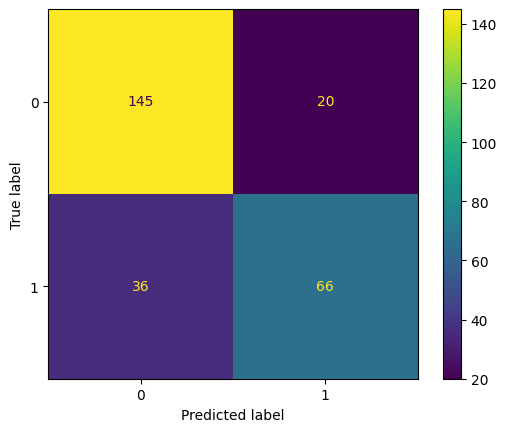

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test,y_pred_rf)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(df['Survived'].value_counts().index))
# plota a matriz de confusão
cmd.plot()
plt.show()

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=200,      # número de árvores
    max_depth=4,           # profundidade das árvores
    learning_rate=0.05,     # taxa de aprendizado
    #subsample=0.8,         # fração de amostras usadas em cada árvore
    #colsample_bytree=0.8,  # fração de features usadas em cada árvore
    random_state=42,
    #eval_metric = 'auc'
)

# Treinar modelo
xgb_model.fit(X_train, y_train)

# Fazer previsões
y_pred_xgb= xgb_model.predict(X_test)

# Avaliar
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Acurácia: 0.8164794007490637
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       165
           1       0.80      0.69      0.74       102

    accuracy                           0.82       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [ ]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'n_estimators': [100, 200, 500],
#    'max_depth': [3, 5, 7, None],
#    'min_samples_split': [2, 5, 10]
#}

#grid = GridSearchCV(RandomForestClassifier(random_state=42),
#-                    param_grid, cv=5, scoring='accuracy')
#grid.fit(X, y)

#print("Melhor modelo:", grid.best_estimator_)

**Best results: RandomForest**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42,stratify=y)
X_test = pd.read_csv('test.csv')
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
X_test.drop(columns=['Name','Cabin','Ticket'],inplace=True)
X_test.dropna(subset=['Embarked'],inplace=True)
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder

scaler = LabelEncoder()
X_test['Sex'] = scaler.fit_transform(X_test[['Sex']])

scaler = MinMaxScaler()
X_test['Age'] = scaler.fit_transform(X_test[['Age']])

scaler = MinMaxScaler()
X_test['Fare'] = scaler.fit_transform(X_test[['Fare']])

scaler = LabelEncoder()
X_test['Embarked'] = scaler.fit_transform(X_test[['Embarked']])
display(X_test.head())

passengerID = X_test['PassengerId']
X_test.drop(columns=['PassengerId'],inplace=True)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,0.452723,0,0,0.015282,1
1,893,3,0,0.617566,1,0,0.013663,2
2,894,2,1,0.815377,0,0,0.018909,1
3,895,3,1,0.353818,0,0,0.016908,2
4,896,3,0,0.287881,1,1,0.023984,2


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
#print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 7 features, but RandomForestClassifier is expecting 6 features as input.

In [ ]:
survived = pd.DataFrame(y_pred)
survived

df2 = passengerID.to_frame()

df2['Survived'] = y_pred

df2.to_csv('submission.csv',index=False)